(202, 29)
(202, 140)


<Figure size 432x288 with 0 Axes>

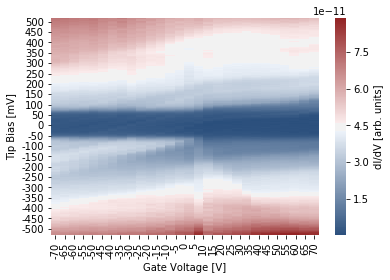

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob, re, os

plt.clf()

# _______ define all variables for plotting and importing data ________

date = "180817"
sample = "BLG_on_Si"

maxbias = 500
minbias = -500

maxgate = 70
mingate = -70
gatestep = 1

gateAxisInterval = 5
biasAxisInterval = 50

gateLabels = np.arange(mingate, maxgate + gateAxisInterval, gateAxisInterval)
numGateTicks = len(gateLabels)
biasLabels = np.arange(minbias, maxbias + biasAxisInterval, biasAxisInterval)
numBiasTicks = len(biasLabels)


dir_name = "/Users/zkrebs/brarlab/data/blg_sweeps/180817/3.5nA"
os.chdir(dir_name)

# ________ end definitions ________

def getFileName(gateVoltage):
    spectrum_files = [ f for f in glob.glob("*.dat") if date in f and sample in f ]
    for file in spectrum_files:  
        result = re.search("^.*_(-?\d*)V", file)
        try:
            gateVal = int(result.group(1)) 
        except:
            continue 
        if gateVal == gateVoltage: 
            return file 
    return None 

gatebias = np.arange(mingate, maxgate + gatestep, gatestep)
gate_intervals = []
last_gate = mingate 

for i in range(0, int((maxgate - mingate)/gatestep) + 1):
    curr_gate = gatebias[i]
    datafile = getFileName(gatebias[i])
    if datafile is None:
        continue
      
    gate_intervals.append(curr_gate-last_gate)
    
    dIdV_f = np.genfromtxt( datafile, dtype=float, comments="#", usecols=(3), skip_header=36)
    dIdV_b = np.genfromtxt( datafile, dtype=float, comments="#", usecols=(7), skip_header=36)
    #I      = np.genfromtxt( datafile, dtype=float, comments="#", usecols=(1), skip_header=19)
    #V      = np.genfromtxt( datafile, dtype=float, comments="#", usecols=(2), skip_header=19)
    
    dIdV_avg = (dIdV_f + dIdV_b)/2
    #norm = np.divide(I,V)
    #ind = int(dIdV_avg.size/2)
    #dIdV_avg = np.delete(dIdV_avg,np.s_[ind-2:ind+2])
    #norm = np.delete(norm,np.s_[ind-2:ind+2])
    dIdV_avg_norm = np.flip(dIdV_avg,axis=0)
    
    last_gate = curr_gate 
    if i == 0:
        sweep = dIdV_avg_norm 
    else:
        sweep = np.vstack([sweep,dIdV_avg_norm])

gate_intervals.pop(0)
new = sweep[0]
for i in range(0, len(gate_intervals)):
    if i == 0: k = 1
    else:      k = 0
    for j in range(0, gate_intervals[i]-k):
        new = np.vstack([new, sweep[i]])

sweep = sweep.transpose()
new = new.transpose()

print(np.shape(sweep))
print(np.shape(new))

plt.figure()
cmap = sns.diverging_palette(250, 12, l = 33, as_cmap=True)
ax = sns.heatmap(new, cbar_kws={'label': 'dI/dV [arb. units]'}, cmap = cmap)


gateLocs = np.arange(0, np.shape(new)[1], np.shape(new)[1]/numGateTicks)
gateLocs += np.shape(new)[1]/(2*numGateTicks)
biasLocs = np.flip(np.arange(0, np.shape(new)[0], np.shape(new)[0]/numBiasTicks), axis=0)
biasLocs += np.shape(new)[0]/(2*numGateTicks)

plt.xticks(gateLocs, [ str(label) for label in gateLabels] )
plt.yticks(biasLocs, [ str(label) for label in biasLabels] )

#oldxlabels = [int(item.get_text()) for item in ax.get_xticklabels()]
#print(oldxlabels)
#newxlabels = list(map( lambda x : int(mingate + x*(maxgate-mingate)/(max(oldxlabels)+4)), oldxlabels ))
#ax.set_xticklabels(newxlabels)

#oldylabels = [int(item.get_text()) for item in ax.get_yticklabels()]
#newylabels = list(map( lambda x : int(maxbias + x*(minbias-maxbias)/max(oldylabels)), oldylabels ))
#ax.set_yticklabels(newylabels)

plt.xlabel('Gate Voltage [V]')
plt.ylabel('Tip Bias [mV]')
         
plt.show()